# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data = df.copy()

<IPython.core.display.Javascript object>

In [4]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [5]:
data.sample(n=5, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62


<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [8]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [79]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- Most of the columns in the data are numeric in nature (integer or float).
- `Brand name`, `os`, `4g` and `5g` columns are of *object* type, which means they have text values.
- Some columns seem to have null (or missing) values too but it seems there are no duplicates.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [80]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

**Observations**

- There are 34 phone brands in the dataset.
- Most of the brands in the dataset are Andriod phones.
- The average price of a used phone is 92 euros whislt a new phone cost on average 237 euros.

In [81]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

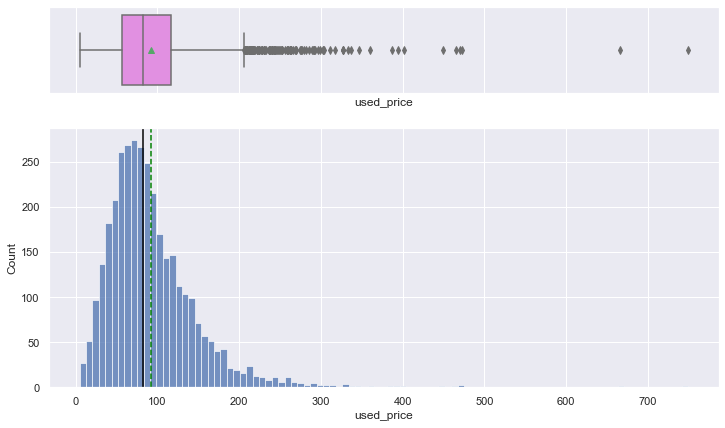

<IPython.core.display.Javascript object>

In [82]:
histogram_boxplot(data, "used_price")

**Observations**

- `Used Price` is right-skewed, indicating few used phones actually cost a lot more.
- Mean used price is around 92 euros with a median of about 82 euros.
- There are outliers in the `used price` of phone as shown by the boxplot

In [83]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

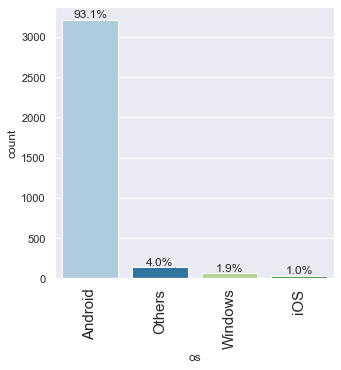

<IPython.core.display.Javascript object>

In [84]:
labeled_barplot(data, "os", perc=True)

- 93.1% of the all phones has an andriod operating system

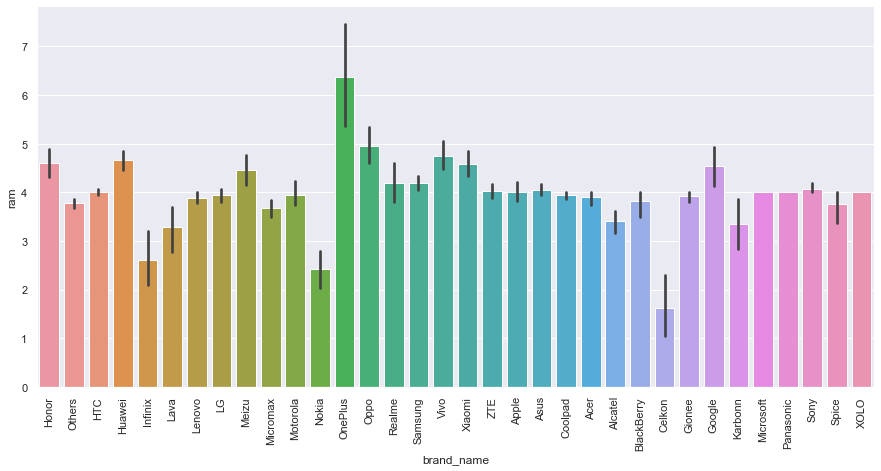

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- One plus has the highest ram among the brands. There does not seem to be much variation amongst the brands thus the ram is relatively similar amongst the brands

In [86]:
df_large_battery = data[data.battery > 4500]

<IPython.core.display.Javascript object>

In [87]:
len(df_large_battery["weight"])

341

<IPython.core.display.Javascript object>

In [88]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values()

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

- Of the 341 phones with 4500 mAh or more battery life, Google has the heaviest phones.

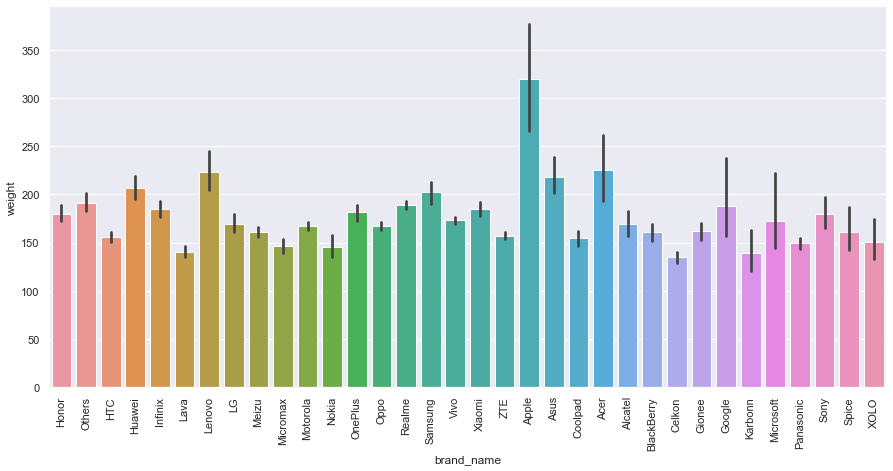

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

- Apple has the heaviest phone among the brands. There does not seem to be much variation amongst the brands thus the weight is relatively similar amongst the brands

In [90]:
# cm to inches divide by 2.54
data["screen_size"] = data["screen_size"] / 2.54

<IPython.core.display.Javascript object>

In [91]:
screen6 = data[data["screen_size"] > 6]
screen6.shape

(1099, 15)

<IPython.core.display.Javascript object>

In [92]:
screen6["brand_name"].value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Lenovo        69
Xiaomi        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
Micromax       7
HTC            7
Google         4
XOLO           3
Gionee         3
Coolpad        3
Spice          2
Panasonic      2
Karbonn        2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

- Of the 1099 phones Huawei has the largest number of phones witha screen size larger than 6

In [93]:
data["device_category"] = pd.cut(
    x=data.new_price,
    bins=[-np.infty, 250, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

data["device_category"].value_counts()

Budget        2290
Premium        585
Mid-ranger     579
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

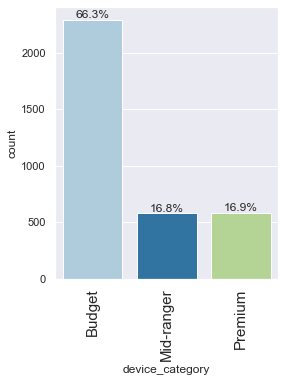

<IPython.core.display.Javascript object>

In [94]:
labeled_barplot(data, "device_category", perc=True)

- More than 2/3 of the phones are budget friendly phones, whiles 16.8 and 16.9 are mid ranger and premium phones respectively in the dataset.

In [95]:
df_selfie_camera = data[data["selfie_camera_mp"] > 8]

<IPython.core.display.Javascript object>

In [96]:
len(df_selfie_camera)

655

<IPython.core.display.Javascript object>

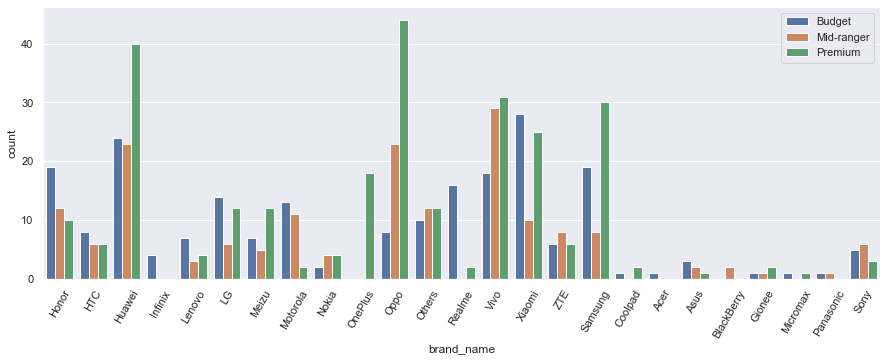

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

## Observation
- Of the 655 phones with selfie camera mp of 8 or better:
- The premium phones seem to have a better selfie cammera than the others
- Oppo has the best selfie camera when it comes to premium phones but the lowest at the budget friendly levels.
- Vivo has the best mid ranger selfie camera, and Xiaomi has the best camera at the budget friendly levels.

In [98]:
def corr_heatmap(num_corr):
    plt.figure(figsize=(14, 10))

    mask = np.triu(np.ones_like(num_corr.corr(), dtype=np.bool))
    sns.axes_style("white")
    heat_map = sns.heatmap(
        num_corr.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap="coolwarm"
    )
    plt.title("Correlation  Heatmap")
    plt.show()

<IPython.core.display.Javascript object>

<ipython-input-98-6774d5bdbcb1>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_corr.corr(), dtype=np.bool))


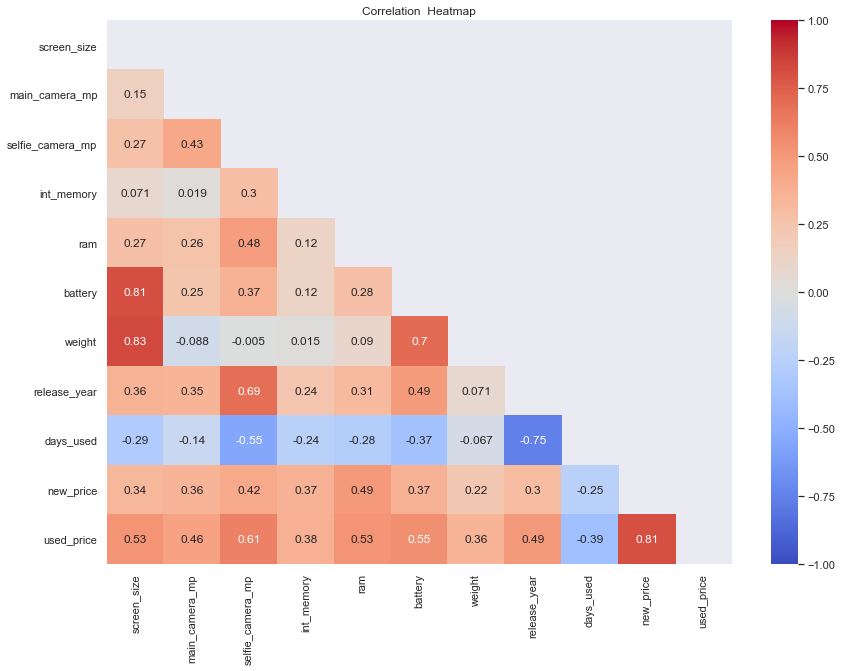

<IPython.core.display.Javascript object>

In [99]:
corr_heatmap(data)

- There is a modertae positive correlation between used price and selfie_camera_mp 
- There does seem to be low to no correlation between internal memory and used price.
- There is a moderate correlation between the used price and (battery, and screen size)
- There seem to be a low correlation between used price and (weight, int_memory and release year)
- Suprisingly there is a positively high correlation with the new price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [100]:
df1 = data.copy()
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [101]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [102]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby("brand_name")[col].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [103]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

## Observations
- There are no more missing value as they were filled with the median values of each variable 

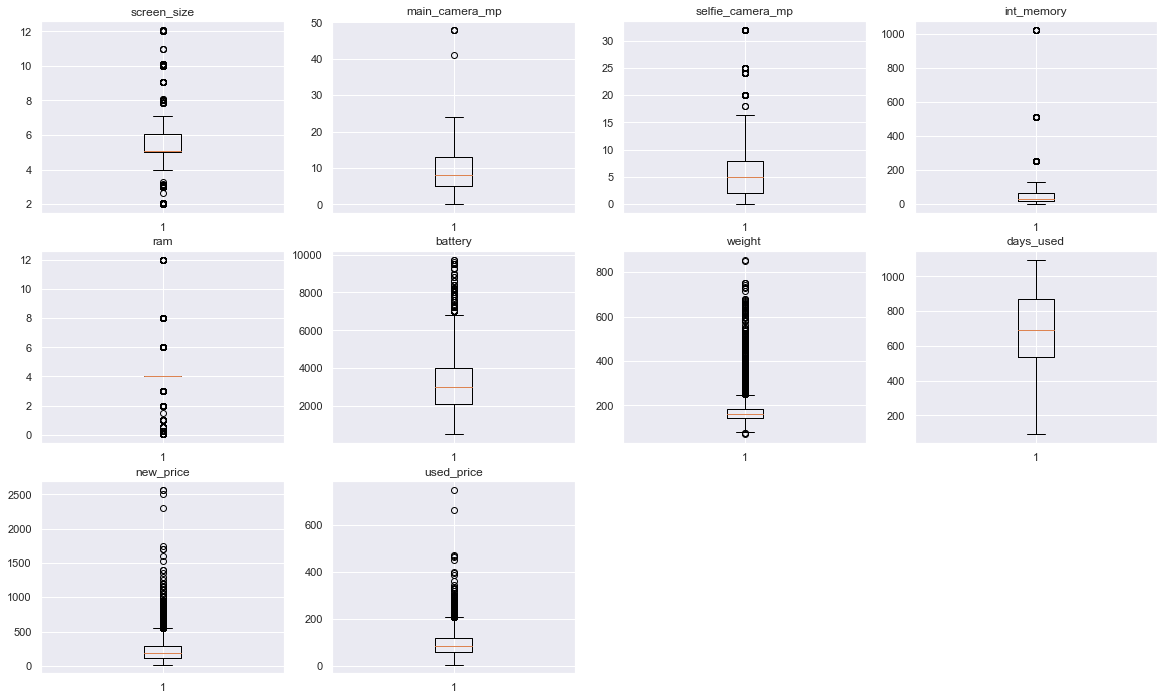

<IPython.core.display.Javascript object>

In [104]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")
plt.figure(figsize=(20, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable])
    plt.title(variable)

- From the boxplots most of the data are skewed with lots of outliers

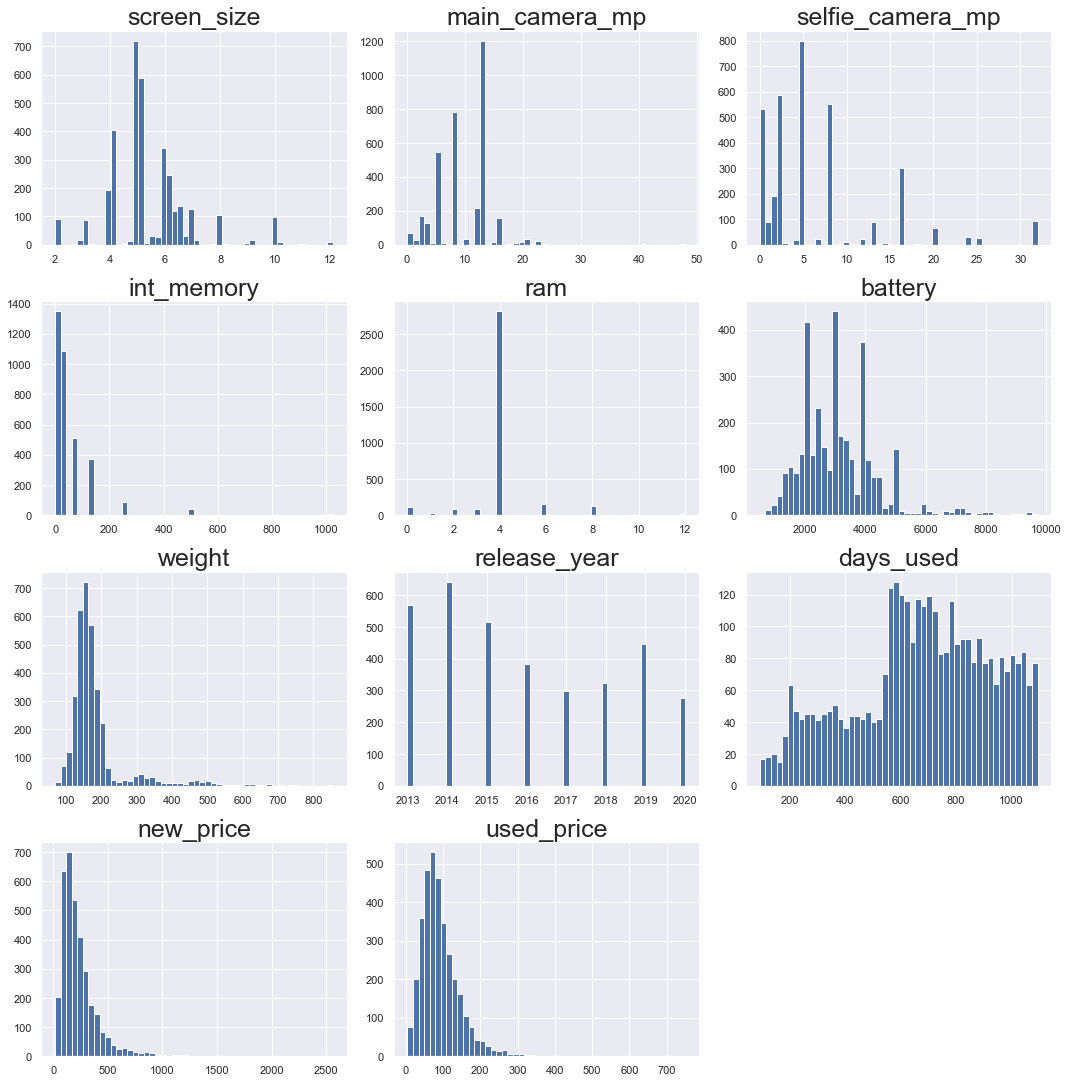

<IPython.core.display.Javascript object>

In [105]:
dist_cols = [
    item for item in df1.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to all the data.**

In [106]:
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [107]:
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()

,brand_name,os,4g,5g,device_category,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,release_year_log,days_used_log,new_price_log,used_price_log
0,Honor,Android,yes,no,Budget,1.903399,2.639057,1.791759,4.174387,1.386294,8.013343,4.990433,7.611348,4.852030,4.724019,4.320949
1,Honor,Android,yes,yes,Budget,2.055536,2.639057,2.833213,4.859812,2.197225,8.366603,5.365976,7.611348,5.786897,5.523020,5.167810
2,Honor,Android,yes,yes,Premium,2.024307,2.639057,2.197225,4.859812,2.197225,8.343078,5.365976,7.611348,5.093750,5.887409,5.117095
3,Honor,Android,yes,yes,Mid-ranger,2.401468,2.639057,2.197225,4.174387,1.945910,8.888895,6.175867,7.611348,5.846439,5.634540,5.141254
4,Honor,Android,yes,no,Budget,1.950399,2.639057,2.197225,4.174387,1.386294,8.517393,5.225747,7.611348,5.683580,4.954911,4.402319


<IPython.core.display.Javascript object>

In [108]:
df2.shape

(3454, 16)

<IPython.core.display.Javascript object>

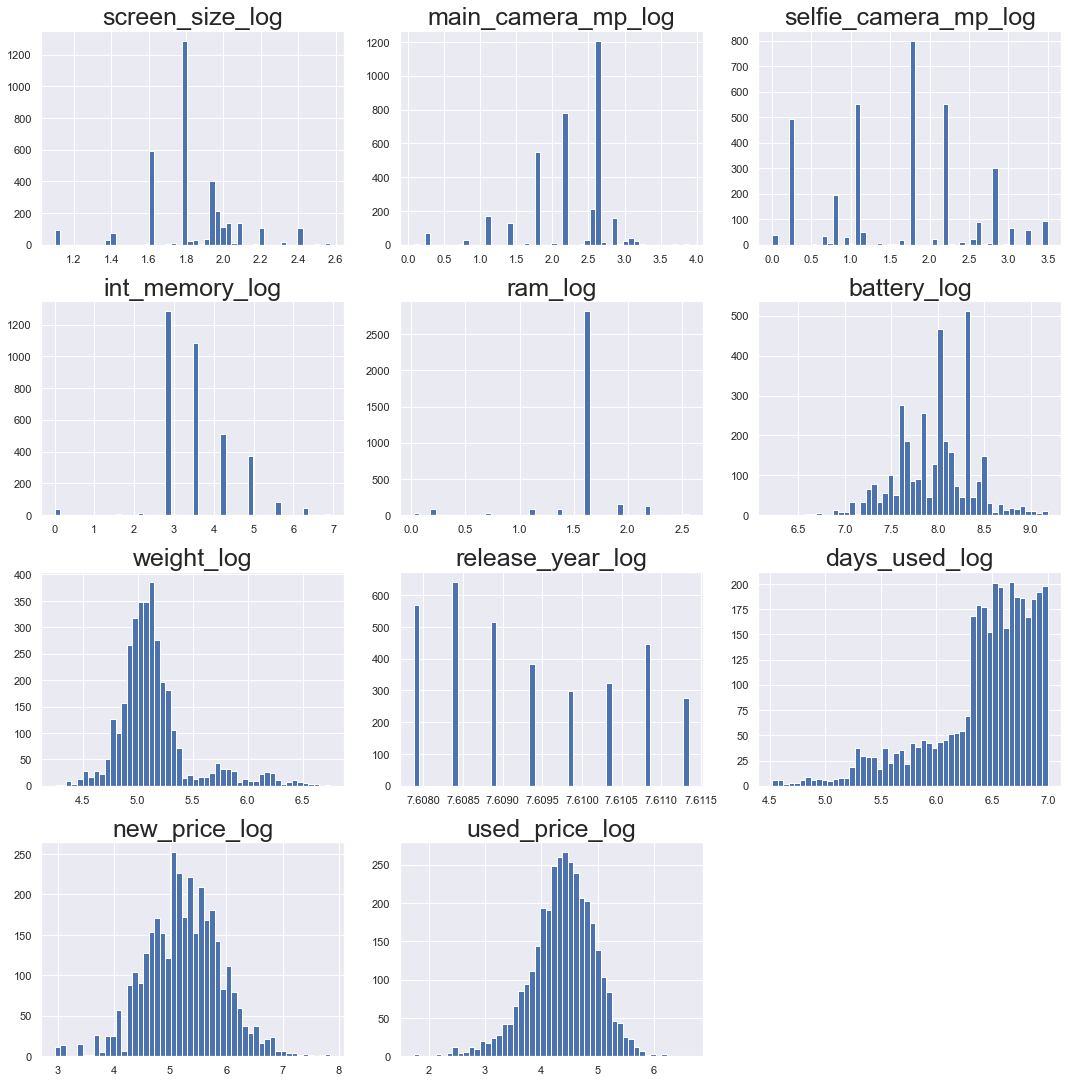

<IPython.core.display.Javascript object>

In [109]:
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    # sns.histplot(data=df2, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

- Some of the features are still skewed but for the most part most are close to normal

## EDA

- It is a good idea to explore the data once again after manipulating it.

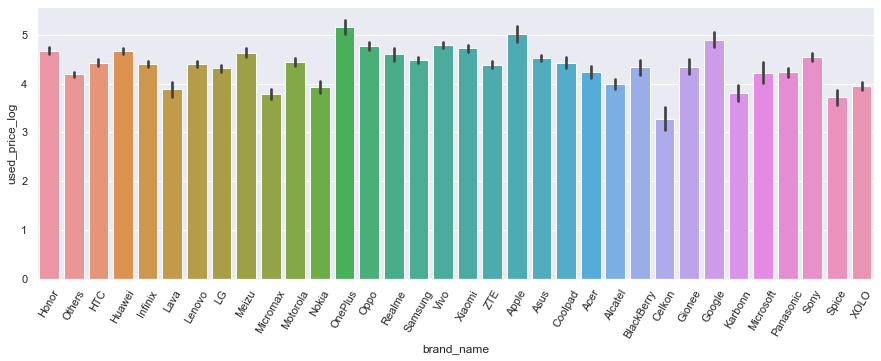

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df2, x="brand_name", y="used_price_log")
plt.xticks(rotation=60)
plt.show()

- An investigation into the brand name suggests that used phone price are not significantly different even though there may be a few low ones.

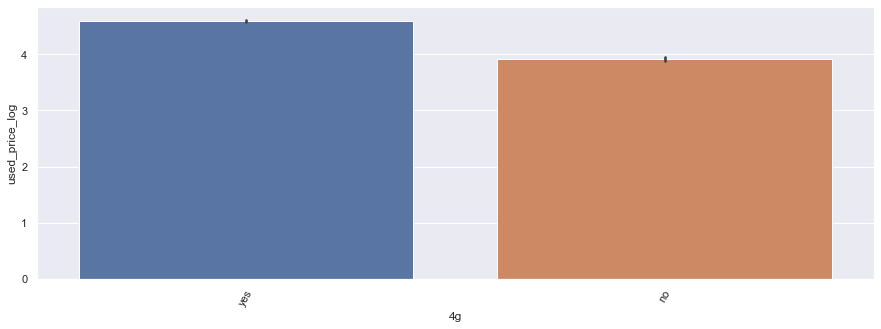

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df2, x="4g", y="used_price_log")
plt.xticks(rotation=60)
plt.show()

- There are more 4g phone that have a used price on them according to this data

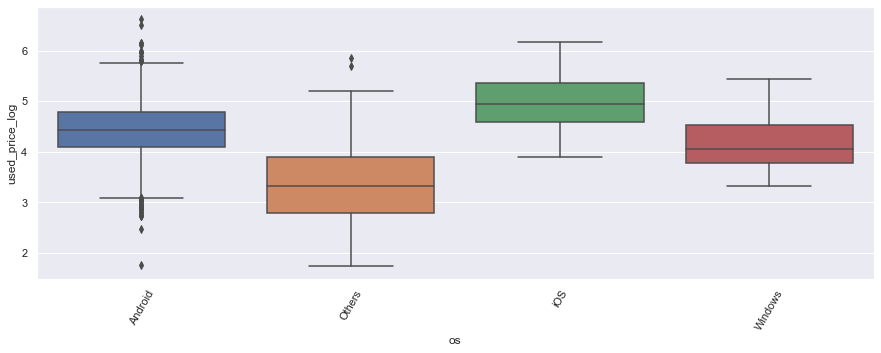

<IPython.core.display.Javascript object>

In [112]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2, x="os", y="used_price_log")
plt.xticks(rotation=60)
plt.show()

- On average the used price of IOS is higher than the other operating system, but Andriod does have the highest used phone price

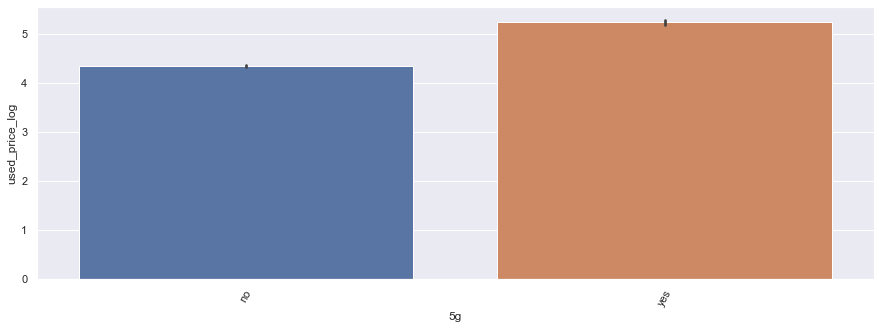

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df2, x="5g", y="used_price_log")
plt.xticks(rotation=60)
plt.show()

- There are more used phone with 5g than there are not

<ipython-input-98-6774d5bdbcb1>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_corr.corr(), dtype=np.bool))


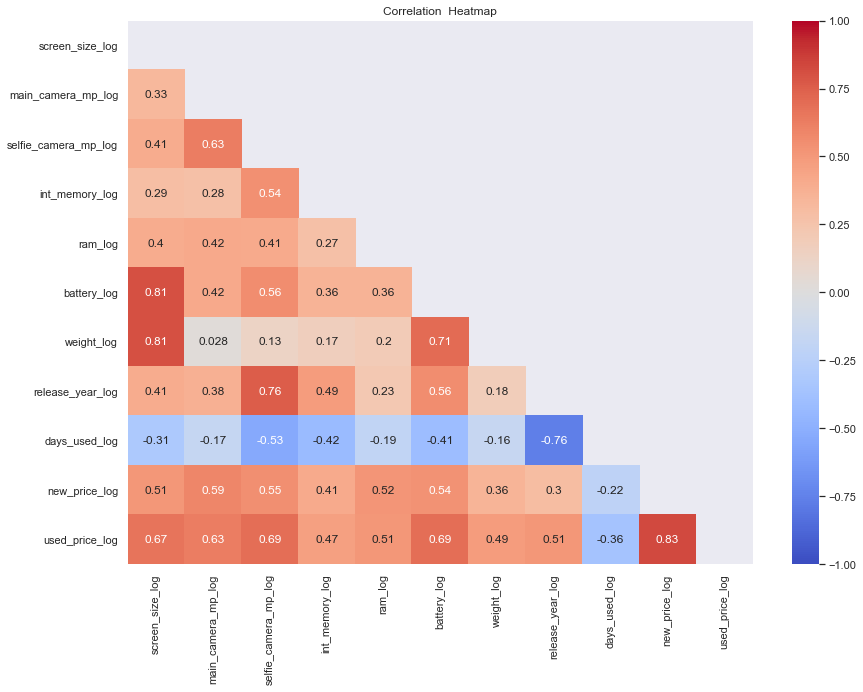

<IPython.core.display.Javascript object>

In [114]:
corr_heatmap(df2)


- There is a moderate correlation between the log of used price and (log of screen size, lof of both cameras, battery, ram, release year).
- There seem to be a low correlation between used price and (log of int memory, and log of days used)
- Suprisingly there is a positively high correlation with the new price

In [115]:
df2.columns

Index(['brand_name', 'os', '4g', '5g', 'device_category', 'screen_size_log',
       'main_camera_mp_log', 'selfie_camera_mp_log', 'int_memory_log',
       'ram_log', 'battery_log', 'weight_log', 'release_year_log',
       'days_used_log', 'new_price_log', 'used_price_log'],
      dtype='object')

<IPython.core.display.Javascript object>

## Building a Linear Regression model

In [116]:
X = df2.drop(["used_price_log", "device_category"], axis=1)
y = df2["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os   4g   5g  screen_size_log  main_camera_mp_log  \
0      Honor  Android  yes   no         1.903399            2.639057   
1      Honor  Android  yes  yes         2.055536            2.639057   
2      Honor  Android  yes  yes         2.024307            2.639057   
3      Honor  Android  yes  yes         2.401468            2.639057   
4      Honor  Android  yes   no         1.950399            2.639057   

   selfie_camera_mp_log  int_memory_log   ram_log  battery_log  weight_log  \
0              1.791759        4.174387  1.386294     8.013343    4.990433   
1              2.833213        4.859812  2.197225     8.366603    5.365976   
2              2.197225        4.859812  2.197225     8.343078    5.365976   
3              2.197225        4.174387  1.945910     8.888895    6.175867   
4              2.197225        4.174387  1.386294     8.517393    5.225747   

   release_year_log  days_used_log  new_price_log  
0          7.611348       4.852030       4.724

<IPython.core.display.Javascript object>

In [117]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size_log,main_camera_mp_log,selfie_camera_mp_log,int_memory_log,ram_log,battery_log,weight_log,release_year_log,days_used_log,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.903399,2.639057,1.791759,4.174387,1.386294,8.013343,4.990433,7.611348,4.852030,4.724019,...,0,0,0,0,0,0,0,0,1,0
1,2.055536,2.639057,2.833213,4.859812,2.197225,8.366603,5.365976,7.611348,5.786897,5.523020,...,0,0,0,0,0,0,0,0,1,1
2,2.024307,2.639057,2.197225,4.859812,2.197225,8.343078,5.365976,7.611348,5.093750,5.887409,...,0,0,0,0,0,0,0,0,1,1
3,2.401468,2.639057,2.197225,4.174387,1.945910,8.888895,6.175867,7.611348,5.846439,5.634540,...,0,0,0,0,0,0,0,0,1,1
4,1.950399,2.639057,2.197225,4.174387,1.386294,8.517393,5.225747,7.611348,5.683580,4.954911,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [119]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [120]:
x_train1 = sm.add_constant(x_train)

x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     274.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:23:28   Log-Likelihood:                 190.18
No. Observations:                2417   AIC:                            -282.4
Df Residuals:                    2368   BIC:                             1.368
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -172.97

<IPython.core.display.Javascript object>

## Model performance evaluation

In [121]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [122]:
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,24.682158,16.357353,18.304565,0.80199,0.797891


<IPython.core.display.Javascript object>

In [123]:
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,24.017332,16.435559,18.729755,0.793428,0.783173


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.801, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict used price within a mean error of 16.4 euros on the test data.

- MAPE of 18.73 on the test data means that we are able to predict within 18.73% of the used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [125]:
checking_vif(x_train1)

,feature,VIF
0,const,2.613436e+08
1,screen_size_log,6.976958e+00
2,main_camera_mp_log,3.073495e+00
3,selfie_camera_mp_log,4.779211e+00
4,int_memory_log,2.112454e+00
5,ram_log,2.080675e+00
6,battery_log,4.790154e+00
7,weight_log,5.602027e+00
8,release_year_log,5.832552e+00
9,days_used_log,3.030661e+00


<IPython.core.display.Javascript object>

* `screen_size_log`,`weigth_log`, `release_year_log`, `brand_name_huawei`, `brand_name_others` and `brand_name_samsung` have VIFs slightly greater than 5.


In [126]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [127]:
col_list = [
    "screen_size_log",
    "weight_log",
    "release_year_log",
    "brand_name_huawei",
    "brand_name_Others",
    "brand_name_samsung",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.844721,0.225920
1,brand_name_huawei,0.844661,0.225964
2,brand_name_samsung,0.844661,0.225964
3,release_year_log,0.844372,0.226173
4,screen_size_log,0.842118,0.227805
5,weight_log,0.836842,0.231580


<IPython.core.display.Javascript object>

* Dropping all would have the maximum impact on the predictive power of the model

In [128]:
col_to_drop = "weight_log"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]


vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
0,const,2.602323e+08
1,screen_size_log,3.887485e+00
2,main_camera_mp_log,2.813273e+00
3,selfie_camera_mp_log,4.685328e+00
4,int_memory_log,2.112451e+00
5,ram_log,2.080239e+00
6,battery_log,4.170001e+00
7,release_year_log,5.807954e+00
8,days_used_log,3.015979e+00
9,new_price_log,3.207204e+00


<IPython.core.display.Javascript object>

* Dropping `weight_log` has brought the VIF of `screen_size_log` below 5.
* The others still have a VIF score of much greater than 5.

In [129]:
# initial list of columns
cols = (
    x_train2.columns.tolist()
)  ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[
        cols
    ]  ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size_log', 'main_camera_mp_log', 'selfie_camera_mp_log', 'int_memory_log', 'ram_log', 'release_year_log', 'new_price_log', 'brand_name_BlackBerry', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others']


<IPython.core.display.Javascript object>

In [130]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [131]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:23:29   Log-Likelihood:                 118.55
No. Observations:                2417   AIC:                            -213.1
Df Residuals:                    2405   BIC:                            -143.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -131.66

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.838**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output used price (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-131.6650**. This value does not make sense in practice


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen size log` is **0.7532**.


4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.845 to 0.838, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

- None of the variables are significant

**Observations**

* Now adjusted R-squared is also 0.838, i.e., our model is able to explain about ~84% of the variation in used_price_log. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.845. This shows that the variables we dropped were not affecting the model much.

In [132]:
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,24.906784,16.707878,18.881345,0.798369,0.797363


<IPython.core.display.Javascript object>

In [133]:
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,23.924514,16.557808,19.0314,0.795022,0.79262


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.798, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict used price within a mean error of 16.56 euros on the test data.

- MAPE of 19.03 on the test data means that we are able to predict within 19.03% of the used price.

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.


In [134]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel2.fittedvalues
df_pred["Residuals"] = olsmodel2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.104130,3.839759,0.264370
1525,4.460029,4.611247,-0.151219
1128,4.328626,4.358441,-0.029815
3003,4.295788,4.315241,-0.019454
2907,4.467975,4.430297,0.037678


<IPython.core.display.Javascript object>

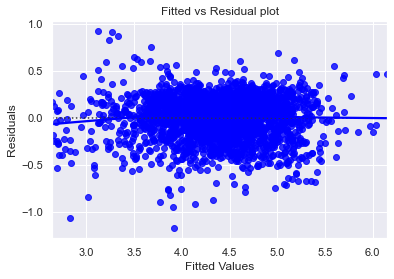

<IPython.core.display.Javascript object>

In [135]:
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.


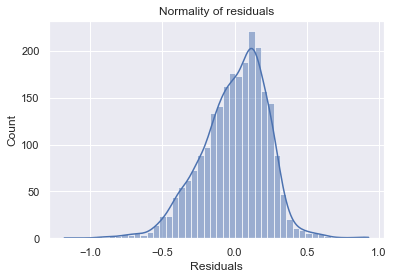

<IPython.core.display.Javascript object>

In [136]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

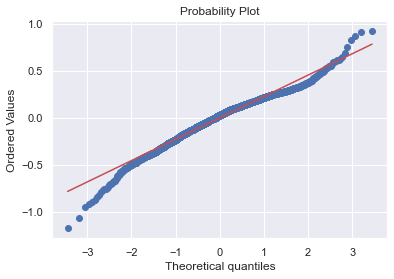

<IPython.core.display.Javascript object>

In [137]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.

In [138]:
stats.shapiro(df_pred["Residuals"])  ## Complete the code to check p-value

ShapiroResult(statistic=0.9774692058563232, pvalue=4.172668397559765e-19)

<IPython.core.display.Javascript object>

- The shapiro wilks test suggest that the residuals are not normal and hence we should proceed with caution, since we are taking an approximation

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.


In [139]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0963065914339338), ('p-value', 0.0559570166435182)]

<IPython.core.display.Javascript object>

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary

In [140]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:23:32   Log-Likelihood:                 118.55
No. Observations:                2417   AIC:                            -213.1
Df Residuals:                    2405   BIC:                            -143.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -131.66

<IPython.core.display.Javascript object>

In [141]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train3, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,24.906784,16.707878,18.881345,0.798369,0.797363


<IPython.core.display.Javascript object>

In [142]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj. R-squared
0,23.924514,16.557808,19.0314,0.795022,0.79262


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.798, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict used price within a mean error of 16.56 euros on the test data.

- MAPE of 19.03 on the test data means that we are able to predict within 19.03% of the used price.

## Actionable Insights and Recommendations



1. Brand like blackberry reduces the price of used phone and hence the company should avoid such phones.

2. According to the data, Andriod is the is the most widely used operating system and therefore the company should look to buy more andriod operating system phone to be able to sell more. 

2. The price of used phone seem to be positively correlated with when the phone was released this could suggest that the Company should buy more recently released used phone rather than older model as the resale values are higher. 


3. We also notice that there are more 4g supported phones than 5g and hence the company should invest more into that as it seems to sell more than the 5g and does not really depend on whether the phone is budget friendly, mid ranger or premium. 


4. According to the data, there is not much of a significant difference in the Ram of a brand of phone. So the Company should not care too much on which brand has a higher ram.


5. The company should focus on more budget friendly phones to sell as the resale price is not that expensive and more customers can buy them.


6. Also whether the phone has a better camera mega pixels on both the front and the back can also affect the price of the used phone hence the company must take into consideration when purchasing used phones for resale.


7. A unit increase in Screen Size does predict the price of a used phone to go up by 0.75 euros, since it has a positive relation with used price. I would suggest the compay look into phones with larger screen sizes as they sell for more.

8. The model seem to fit the model well as seen by the value of the R-squared


9. A  unit increase in the Release year does increase the price of a used phone by over 17 euros. It can be suggested that the company go for more recntly released used phone than older models 

